In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import traceback

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, f1_score,roc_auc_score, confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Problem Statement

To Predict whether the Machine will turn up as failure or not. Build a model and test the predictions using API. Also deploy the same model on any of the cloud service platform.

# Data Gathering

In [2]:
df = pd.read_csv('data_1.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df['UDI'].nunique()

10000

In [6]:
df['Product ID'].nunique()

10000

In [7]:
# dropping the features 'UDI' & 'Product ID' because they seems like just indices.
df.drop(['UDI','Product ID'],axis=1, inplace=True)

In [8]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [9]:
# dropping the types of failures, here we do not need individual data of failures since we have complete data of failure in one column.
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'],axis=1,inplace=True)

In [10]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [11]:
df.corr(method='kendall').tail(1)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Machine failure,0.068454,0.032925,-0.136655,0.138527,0.083171,1.0


In [12]:
# checking null values
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [13]:
# checking for duplicate records
df.duplicated().sum()

0

In [14]:
# machine failure is our target column
df['Machine failure'].unique()

array([0, 1], dtype=int64)

In [15]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [16]:
# checking the percentage of machine failure
(len(df[df['Machine failure']==1]) / len(df['Machine failure']))*100

3.39

In [17]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [18]:
# Processing on 'Type' column
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [19]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [20]:
df[df['Type']=='L']['Machine failure'].value_counts()

0    5765
1     235
Name: Machine failure, dtype: int64

In [21]:
df[df['Type']=='M']['Machine failure'].value_counts()

0    2914
1      83
Name: Machine failure, dtype: int64

In [22]:
df[df['Type']=='H']['Machine failure'].value_counts()

0    982
1     21
Name: Machine failure, dtype: int64

In [23]:
df['Type'] = df['Type'].replace({'L':0,'M':1,'H':2})

In [24]:
# Processing on 'Air Temperature [K]' column
df['Air temperature [K]'].nunique()

93

<AxesSubplot:>

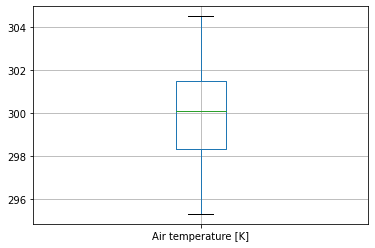

In [25]:
df.boxplot('Air temperature [K]')

In [26]:
df['Process temperature [K]'].nunique()

82

<AxesSubplot:xlabel='Process temperature [K]'>

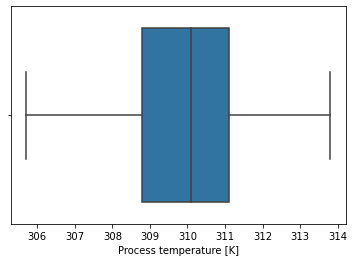

In [27]:
sns.boxplot(df['Process temperature [K]'])

In [28]:
col = df.columns[:-1]
col


Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [29]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col])
df_scaled = pd.DataFrame(df_scaled, columns=col)
df_scaled['Machine failure'] = df['Machine failure']
df_scaled

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000,0
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858,0
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763,0
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668,0
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573,0
...,...,...,...,...,...,...,...
9995,0.5,0.380435,0.333333,0.253783,0.353022,0.055336,0
9996,1.0,0.391304,0.333333,0.270081,0.384615,0.067194,0
9997,0.5,0.402174,0.358025,0.277648,0.406593,0.086957,0
9998,1.0,0.402174,0.370370,0.139697,0.614011,0.098814,0


In [30]:
df_scaled.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.25015,0.511405,0.531551,0.215818,0.497073,0.426684,0.033900
std,0.33565,0.217419,0.183177,0.104356,0.136936,0.251597,0.180981
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.326087,0.382716,0.148428,0.403846,0.209486,0.000000
50%,0.00000,0.521739,0.543210,0.194994,0.498626,0.426877,0.000000
75%,0.50000,0.673913,0.666667,0.258440,0.590659,0.640316,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

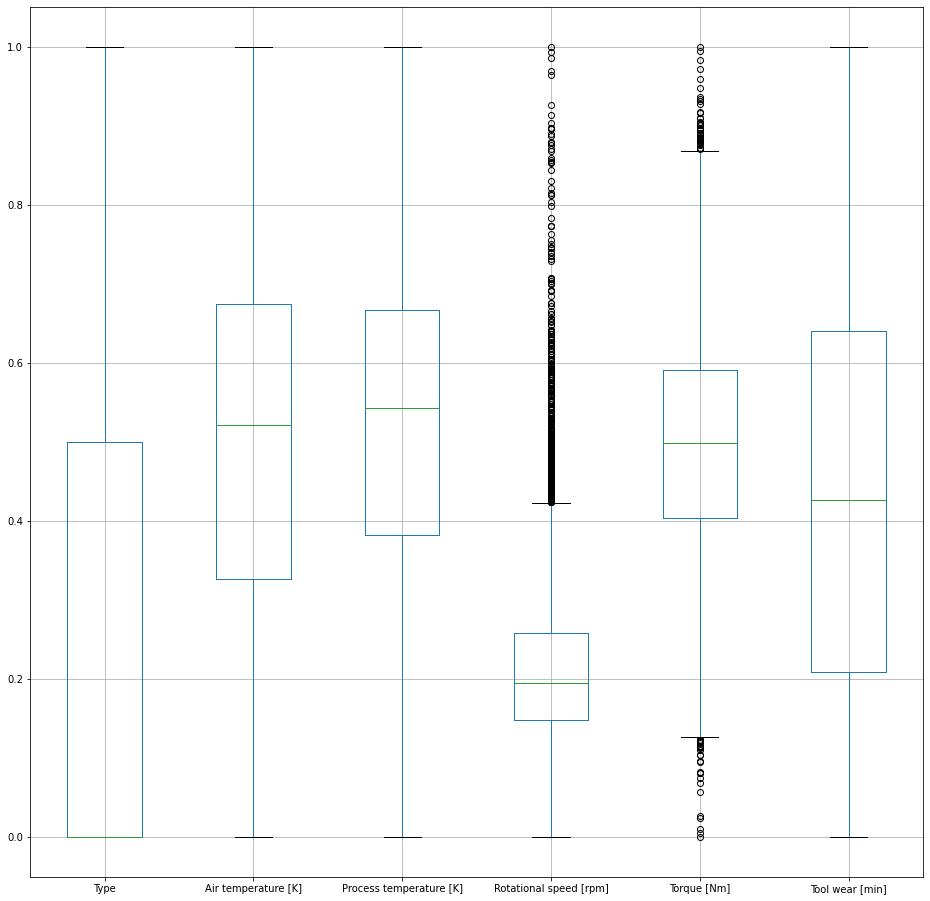

In [31]:
plt.figure(figsize=(16,16))
df_scaled[col].boxplot()

In [32]:
#Outliers treatment for 'Rotational speed [rpm]' column
Q3 = np.quantile(df_scaled['Rotational speed [rpm]'],0.75)
Q1 = np.quantile(df_scaled['Rotational speed [rpm]'],0.25)
IQR = Q3-Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print('Upperbound value is ',upper_bound,'\nlower_bound value is ',lower_bound)

Upperbound value is  0.4234575087310828 
lower_bound value is  -0.01658905704307334


In [33]:
df_scaled[df_scaled['Rotational speed [rpm]']>0.4234575087310828]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
14,0.0,0.358696,0.432099,0.504657,0.217033,0.158103,0
50,0.0,0.391304,0.419753,0.985448,0.010989,0.565217,1
70,0.5,0.391304,0.407407,0.440047,0.258242,0.762846,0
101,0.0,0.380435,0.382716,0.479045,0.232143,0.233202,0
155,1.0,0.336957,0.308642,0.476717,0.219780,0.782609,0
...,...,...,...,...,...,...,...
9865,0.5,0.391304,0.506173,0.746217,0.138736,0.351779,0
9871,0.5,0.391304,0.506173,0.453434,0.245879,0.415020,0
9886,0.0,0.380435,0.481481,0.427823,0.254121,0.573123,0
9926,0.5,0.347826,0.358025,0.424331,0.225275,0.197628,0


In [34]:
mean_rpm = df_scaled[df_scaled['Rotational speed [rpm]']<=0.4234575087310828]['Rotational speed [rpm]'].mean()

df_scaled['Rotational speed [rpm]']=np.where(df_scaled['Rotational speed [rpm]']>0.4234575087310828,mean_rpm,df_scaled['Rotational speed [rpm]'])

In [35]:
df_scaled.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.25015,0.511405,0.531551,0.201516,0.497073,0.426684,0.033900
std,0.33565,0.217419,0.183177,0.074353,0.136936,0.251597,0.180981
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.326087,0.382716,0.148428,0.403846,0.209486,0.000000
50%,0.00000,0.521739,0.543210,0.194994,0.498626,0.426877,0.000000
75%,0.50000,0.673913,0.666667,0.245052,0.590659,0.640316,0.000000
max,1.00000,1.000000,1.000000,0.423166,1.000000,1.000000,1.000000


In [36]:
#Outliers treatment for 'Torque [Nm]' column
Q3 = np.quantile(df_scaled['Torque [Nm]'],0.75)
Q1 = np.quantile(df_scaled['Torque [Nm]'],0.25)
IQR = Q3-Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print('Upperbound value is ',upper_bound,'\nlower_bound value is ',lower_bound)

Upperbound value is  0.8708791208791206 
lower_bound value is  0.12362637362637391


In [37]:
df_scaled[df_scaled['Torque [Nm]']> 0.8708791208791206].shape

(41, 7)

In [38]:
df_scaled[df_scaled['Torque [Nm]']< 0.12362637362637391].shape

(28, 7)

In [39]:
mean_torque = df_scaled[df_scaled['Torque [Nm]']<=0.8708791208791206]['Torque [Nm]'].mean()

df_scaled['Torque [Nm]']=np.where(df_scaled['Torque [Nm]']>0.8708791208791206,mean_torque,df_scaled['Torque [Nm]'])

df_scaled['Torque [Nm]']=np.where(df_scaled['Torque [Nm]']<0.12362637362637391,mean_torque,df_scaled['Torque [Nm]'])

<AxesSubplot:>

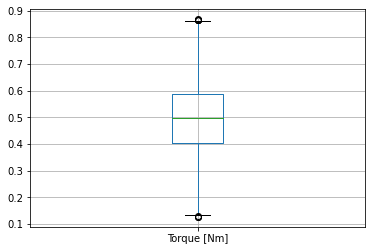

In [40]:
df_scaled.boxplot('Torque [Nm]')

In [69]:
df_scaled.head()

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine failure
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000,0
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858,0
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763,0
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668,0
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573,0


In [72]:
df_scaled.rename(columns={'Air temperature [K]':'Air_temperature_K'}, inplace=True)
df_scaled.rename(columns={'Process temperature [K]':'Process_temperature_K'}, inplace=True)
df_scaled.rename(columns={'Rotational speed [rpm]':'Rotational_speed_rpm'}, inplace=True)
df_scaled.rename(columns={'Torque [Nm]':'Torque_Nm'}, inplace=True)
df_scaled.rename(columns={'Tool wear [min]':'Tool_wear_min'}, inplace=True)
df_scaled

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine failure
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000,0
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858,0
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763,0
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668,0
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573,0
...,...,...,...,...,...,...,...
9995,0.5,0.380435,0.333333,0.253783,0.353022,0.055336,0
9996,1.0,0.391304,0.333333,0.270081,0.384615,0.067194,0
9997,0.5,0.402174,0.358025,0.277648,0.406593,0.086957,0
9998,1.0,0.402174,0.370370,0.139697,0.614011,0.098814,0


In [73]:
df_scaled[df_scaled['Machine failure']==1]

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine failure
50,0.0,0.391304,0.419753,0.201516,0.495386,0.565217,1
69,0.0,0.391304,0.407407,0.140861,0.850275,0.754941,1
77,0.0,0.380435,0.395062,0.167055,0.515110,0.822134,1
160,0.0,0.336957,0.308642,0.066356,0.781593,0.853755,1
161,0.0,0.326087,0.296296,0.142026,0.666209,0.861660,1
...,...,...,...,...,...,...,...
9758,0.0,0.358696,0.506173,0.201516,0.170330,0.861660,1
9764,0.0,0.347826,0.469136,0.073341,0.864011,0.047431,1
9822,0.0,0.347826,0.456790,0.111758,0.784341,0.739130,1
9830,0.0,0.326087,0.444444,0.098370,0.718407,0.814229,1


# Feature selection

### Fisher's score

In [155]:
from skfeature.function.similarity_based import fisher_score

In [48]:
x = df_scaled.drop(['Machine failure'],axis=1)
y = df['Machine failure']

<AxesSubplot:>

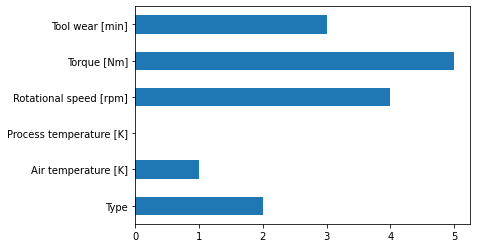

In [157]:
fisher = fisher_score.fisher_score(x.to_numpy(),y)
s = pd.Series(fisher,index=x.columns)
display(s.plot(kind = 'barh'))

<AxesSubplot:>

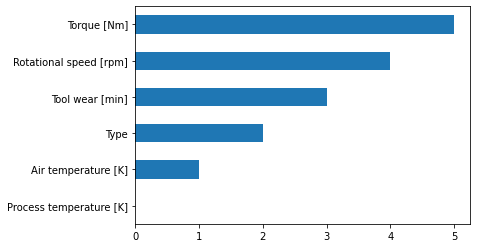

In [158]:
s.sort_values().plot(kind = 'barh')

### Variance Threshold method

In [159]:
from sklearn.feature_selection import VarianceThreshold

In [160]:
var_thr = VarianceThreshold(threshold=0)
var_thr.fit_transform(df_scaled)
var_thr.get_support()
pd.Series(var_thr.get_support(),index=df_scaled.columns)

Type                       True
Air temperature [K]        True
Process temperature [K]    True
Rotational speed [rpm]     True
Torque [Nm]                True
Tool wear [min]            True
Machine failure            True
dtype: bool

# Hold out validation

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Logistic Regression

## Creating instance and fitting the model

In [162]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [163]:
# predicting the test values
y_pred = log_model.predict(x_test)

## Evaluation

In [164]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic model is: ',accuracy)

Accuracy of Logistic model is:  0.9685


In [165]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1937    0]
 [  63    0]]


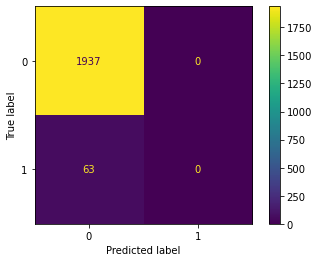

In [166]:
plot_confusion_matrix(log_model,x_test,y_test)

In [167]:
clsf_report = classification_report(y_test,y_pred)
print('Classification Report:\n',clsf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1937
           1       0.00      0.00      0.00        63

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



# KNN model 

## Creating Instance and fitting the model

In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [169]:
# predicting the test values
y_pred_knn = knn_model.predict(x_test)

## Evaluation

In [170]:
accuracy = accuracy_score(y_test,y_pred_knn)
print('Accuracy of KNN model is: ',accuracy)

Accuracy of KNN model is:  0.973


In [171]:
cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix for KNN model:\n',cnf_matrix)

Confusion Matrix for KNN model:
 [[1935    2]
 [  52   11]]


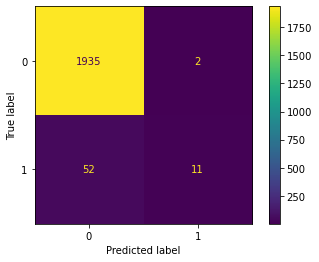

In [172]:
plot_confusion_matrix(knn_model,x_test,y_test)

In [173]:
clsf_report = classification_report(y_test,y_pred_knn)
print('Classification Report:\n',clsf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       0.85      0.17      0.29        63

    accuracy                           0.97      2000
   macro avg       0.91      0.59      0.64      2000
weighted avg       0.97      0.97      0.96      2000



## Hyperparameter Tuning

### GridSearchCV

In [174]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
gscv_model= GridSearchCV(KNeighborsClassifier(),hyperparamters,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [175]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

In [176]:
knn_model=KNeighborsClassifier(n_neighbors=4, p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [177]:
y_pred_gscv = knn_model.predict(x_test)
accuracy_score(y_test,y_pred_gscv)

0.972

In [178]:
cnf_matrix = confusion_matrix(y_test,y_pred_gscv)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1937    0]
 [  56    7]]


In [179]:
clsf_report = classification_report(y_test,y_pred_knn)
print('Classification Report:\n',clsf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       0.85      0.17      0.29        63

    accuracy                           0.97      2000
   macro avg       0.91      0.59      0.64      2000
weighted avg       0.97      0.97      0.96      2000



### RandomizedSearchCV

In [180]:
hyperparamters = {'n_neighbors':np.arange(5,20),
                 'p':[1,2]}
rscv_model= RandomizedSearchCV(knn_model,hyperparamters,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=4, p=1),
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]})

In [181]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_pred_DT = DT_model.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test,y_pred_DT)
print('Accuracy of Decision Tree model is: ',accuracy)

Accuracy of Decision Tree model is:  0.979


In [54]:
cnf_matrix = confusion_matrix(y_test,y_pred_DT)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1913   24]
 [  18   45]]


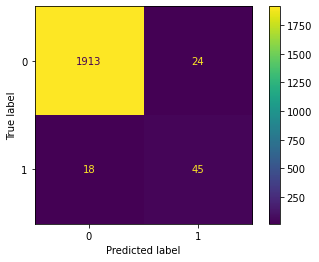

In [56]:
plot_confusion_matrix(DT_model,x_test,y_test)

In [187]:
clsf_report = classification_report(y_test,y_pred_DT)
print('Classification Report:\n',clsf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.61      0.71      0.66        63

    accuracy                           0.98      2000
   macro avg       0.80      0.85      0.82      2000
weighted avg       0.98      0.98      0.98      2000



## Hyperparameter Tuning

### GridSearchCV

In [188]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
DT_model = DecisionTreeClassifier()
gscv_dt_model=GridSearchCV(DT_model,hyperparameters,cv=3)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [189]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=3)

In [190]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2)
DT_model.fit(x_train,y_train)
y_pred_gscv_DT = DT_model.predict(x_test)

In [191]:
accuracy_dt = accuracy_score(y_test,y_pred_gscv_DT)
print('Accuracy of DT model after tuning is: ',accuracy_dt*100)

Accuracy of DT model after tuning is:  98.3


In [192]:
cnf_matrix = confusion_matrix(y_test,y_pred_gscv_DT)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1927   10]
 [  24   39]]


In [193]:
clsf_report = classification_report(y_test,y_pred_gscv_DT)
print('Classification Report:\n',clsf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.80      0.62      0.70        63

    accuracy                           0.98      2000
   macro avg       0.89      0.81      0.84      2000
weighted avg       0.98      0.98      0.98      2000



### RandomizedSearchCV

In [194]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
rscv_dt_model=RandomizedSearchCV(DT_model,hyperparameters,cv=3)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    min_samples_leaf=2),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                                        'min_samples_leaf': array([2, 3]),
                                        'min_samples_split': array([2, 3])})

In [195]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2)

In [196]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3)
DT_model.fit(x_train,y_train)
y_pred_rscv_DT = DT_model.predict(x_test)

In [197]:
accuracy_dt = accuracy_score(y_test,y_pred_rscv_DT)
print('Accuracy of DT model after tuning is: ',accuracy_dt*100)

Accuracy of DT model after tuning is:  97.89999999999999


# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred_RF = RF_model.predict(x_test)

In [59]:
accuracy_rf = accuracy_score(y_test,y_pred_RF)
print('Accuracy of Random Forest model is: ',accuracy_rf*100)

Accuracy of Random Forest model is:  98.55000000000001


In [60]:
cnf_matrix = confusion_matrix(y_test,y_pred_RF)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1933    4]
 [  25   38]]


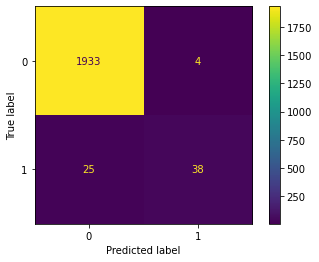

In [61]:
plot_confusion_matrix(RF_model,x_test,y_test)

In [62]:
clsf_report = classification_report(y_test,y_pred_RF)
print('Classification Report:\n',clsf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1937
           1       0.90      0.60      0.72        63

    accuracy                           0.99      2000
   macro avg       0.95      0.80      0.86      2000
weighted avg       0.98      0.99      0.98      2000



### Saving model using pickle

In [63]:
# As we can see Random forest model gives us the Best accuracy amongst all models we applied.
# So we will use these model for our project.
# We are saving the model here using pickle.

import pickle
with open ('Random_Forest_Classifier.pickle','wb') as model:
    pickle.dump(RF_model,model)

## Hyperparameter tuning

### GridSearchCV

In [211]:
%%time
params = {'n_estimators':np.arange(10,20),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(5,15),
         'min_samples_leaf':np.arange(1,6),
         'min_samples_split':np.arange(2,6),
         'random_state':[10],
         'ccp_alpha':np.arange(0.01,1,0.1)}

rf_model=RandomForestClassifier()

gscv_rf_model=GridSearchCV(rf_model,params,cv=5)
gscv_rf_model.fit(x_train,y_train)

CPU times: total: 4h 57min 38s
Wall time: 5h 3min 58s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4, 5]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [10]})

In [212]:
gscv_rf_model.best_estimator_

RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       min_samples_split=3, n_estimators=10, random_state=10)

In [224]:
# creating instance after tuning
RF_model_G = RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       min_samples_split=3, n_estimators=10, random_state=10)

RF_model.fit(x_train,y_train)
y_pred_rf = RF_model.predict(x_test)

In [246]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of RF model after tuning is: ',accuracy_rf*100)

Accuracy of RF model after tuning is:  96.85000000000001


In [247]:
cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1937    0]
 [  63    0]]


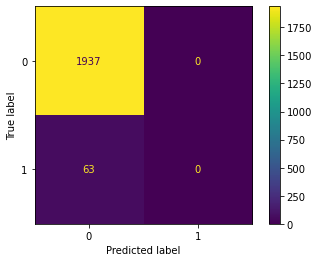

In [227]:
plot_confusion_matrix(RF_model, x_test,y_test)

### RandomizedSearchCV

In [214]:
%%time
params = {'n_estimators':np.arange(10,20),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,20),
         'min_samples_leaf':np.arange(1,10),
         'min_samples_split':np.arange(2,10),
         'max_features':['auto'],
         'random_state':[10],
         'ccp_alpha':np.arange(0.01,1,0.1)}

rf_model=RandomForestClassifier()

rscv_rf_model=RandomizedSearchCV(rf_model,params,cv=5)
rscv_rf_model.fit(x_train,y_train)

CPU times: total: 4.31 s
Wall time: 4.34 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'random_state': [10]})

In [215]:
rscv_rf_model.best_estimator_

RandomForestClassifier(ccp_alpha=0.11, criterion='entropy', max_depth=7,
                       max_features='auto', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=12, random_state=10)

In [244]:
RF_model_R = RandomForestClassifier(ccp_alpha=0.11, criterion='entropy', max_depth=7,
                       max_features='auto', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=12, random_state=10)
RF_model_R.fit(x_train,y_train)
y_pred_rf_rscv = RF_model_R.predict(x_test)

In [245]:
accuracy_rf = accuracy_score(y_test,y_pred_rf_rscv)
print('Accuracy of RF model after tuning is: ',accuracy_rf*100)

Accuracy of RF model after tuning is:  96.85000000000001


In [235]:
cnf_matrix = confusion_matrix(y_test,y_pred_rf_rscv)
print('Confusion matrix:\n',cnf_matrix)

Confusion matrix:
 [[1937    0]
 [  63    0]]


In [232]:
clf_report = classification_report(y_test,y_pred_rf_rscv)
print('Classification report:\n',clf_report)

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1937
           1       0.00      0.00      0.00        63

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



# Adaboost

In [236]:
from sklearn.ensemble import AdaBoostClassifier

In [237]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_train,y_train)
y_pred_ada = AB_model.predict(x_test)

In [248]:
accuracy_ada = accuracy_score(y_test,y_pred_ada)
print('Accuracy of Adaboost model is: ',accuracy_ada*100)

Accuracy of Adaboost model is:  97.5


In [249]:
cnf_matrix = confusion_matrix(y_test,y_pred_ada)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1928    9]
 [  41   22]]


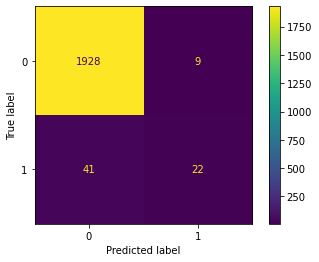

In [250]:
plot_confusion_matrix(AB_model,x_test,y_test)

In [251]:
clf_report = classification_report(y_test,y_pred_ada)
print('Classification report: \n',clf_report)

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1937
           1       0.71      0.35      0.47        63

    accuracy                           0.97      2000
   macro avg       0.84      0.67      0.73      2000
weighted avg       0.97      0.97      0.97      2000



### RandomizedSearchCV

In [254]:
%%time
params = {'n_estimators':np.arange(10,100),
            'random_state':np.arange(1,10),
         "learning_rate" : np.arange(0,2,0.001)}

ada = AdaBoostClassifier()
rscv_model_ada = RandomizedSearchCV(ada,params,cv=10)
rscv_model_ada.fit(x_train,y_train)

CPU times: total: 29.8 s
Wall time: 30.3 s


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [255]:
y_pred_ada_rs = rscv_model_ada.predict(x_test)

accuracy_score(y_test,y_pred_ada_rs)

0.9735

### GridSearchCV

In [ ]:
%%time
params = {'n_estimators':np.arange(10,50),
            'random_state':np.arange(1,10),
         "learning_rate" : np.arange(0,2,0.001)}

ada = AdaBoostClassifier()
gscv_model_ada = GridSearchCV(ada,params,cv=10)
gscv_model_ada.fit(x_train,y_train)

In [ ]:
y_pred_ada_gs = gscv_model_ada.predict(x_test)

accuracy_score(y_test,y_pred_ada_gs)

# SVM Classifier

In [258]:
from sklearn.svm import SVC

In [259]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)

In [261]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of SVM model is: ',accuracy_svm*100)

Accuracy of SVM model is:  96.85000000000001


In [262]:
cnf_matrix = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix: \n',cnf_matrix)

Confusion matrix: 
 [[1937    0]
 [  63    0]]


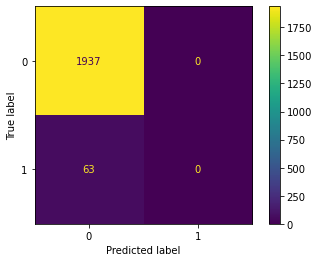

In [263]:
plot_confusion_matrix(svm_model,x_test,y_test)

In [265]:
clsf_report = classification_report(y_test,y_pred_svm)
print('Classification report:\n',clsf_report)

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1937
           1       0.00      0.00      0.00        63

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



## Hyperparameter tuning

### GridSearchCV

In [267]:
svm_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [268]:
%%time
parameters = ({'C':np.arange(1,50),
              'kernel':['linear','poly','rbf','sigmoid']})
gscv_model_svm = GridSearchCV(svm_model,parameters,cv=5)
gscv_model_svm.fit(x_train,y_train)

CPU times: total: 28min 11s
Wall time: 28min 32s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [271]:
gscv_model_svm.best_estimator_

SVC(C=43)

In [272]:
gscv_model_svm.best_params_

{'C': 43, 'kernel': 'rbf'}

In [274]:
svm_model_gs = SVC(C=43,kernel='rbf')
svm_model_gs.fit(x_train,y_train)
y_pred_gscv_svm = svm_model_gs.predict(x_test)

In [276]:
accuracy_svm = accuracy_score(y_test,y_pred_gscv_svm)
print('Accuracy of SVM model after tuning is: ',accuracy_svm*100)

Accuracy of SVM model after tuning is:  97.65


Confusion matrix:


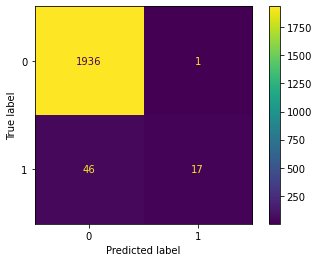

In [278]:
cnf_matrix = plot_confusion_matrix(svm_model_gs,x_test,y_test)
print('Confusion matrix:\n',cnf_matrix)

In [279]:
clsf_report = classification_report(y_test,y_pred_gscv_svm)
print('Classification report:\n',clsf_report)

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1937
           1       0.94      0.27      0.42        63

    accuracy                           0.98      2000
   macro avg       0.96      0.63      0.70      2000
weighted avg       0.98      0.98      0.97      2000



### RandomizedSearchCV

In [282]:
%%time
parameters = ({'C':np.arange(1,50),
              'kernel':['linear','poly','rbf','sigmoid']})
rscv_model_svm = RandomizedSearchCV(svm_model,parameters,cv=5)
rscv_model_svm.fit(x_train,y_train)

CPU times: total: 2min 19s
Wall time: 2min 20s


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [283]:
gscv_model_svm.best_estimator_

SVC(C=43)

In [284]:
gscv_model_svm.best_params_

{'C': 43, 'kernel': 'rbf'}

In [293]:
RF = pickle.load(open('Random_Forest_Classifier.pickle','rb'))
RF

RandomForestClassifier()

In [299]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0
9996,2,298.9,308.4,1632,31.8,17,0
9997,1,299.0,308.6,1645,33.4,22,0
9998,2,299.0,308.7,1408,48.5,25,0
